# Text Analysis 

* Sentiment Analysis

In [1]:
# set up
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

In [2]:
# import text files
# these are grabbed from the "text analysis files" folder on UVA Box

LIB = pd.read_csv('../../data/Text Analysis Files/LIB.csv')
TOKEN = pd.read_csv('../../data/Text Analysis Files/TOKEN.csv')
DOC = pd.read_csv('../../data/Text Analysis Files/DOC.csv')
TFIDF = pd.read_csv('../../data/Text Analysis Files/TFIDF.csv')

## Sentiment Analysis

In [3]:
# get lexicon
## using NRC.csv

NRC = pd.read_csv('NRC.csv')
NRC.columns = [col.replace('nrc_','') for col in NRC.columns]
NRC

,word,sentiment
0,abacus,trust
1,abandon,fear
2,abandon,negative
3,abandon,sadness
4,abandoned,anger
...,...,...
13896,zest,anticipation
13897,zest,joy
13898,zest,positive
13899,zest,trust


In [4]:
# change table so the sentiments are rows with values 0 or 1 
NRC = pd.crosstab(NRC['word'], NRC['sentiment']).reset_index().rename_axis(None, axis=1)
NRC=NRC.rename(columns = {'word':'term_str'})
NRC = NRC.iloc[1:]
#NRC = NRC.astype(object)
NRC

,term_str,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0
5,abba,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6463,zany,0,0,0,0,0,0,0,0,1,0
6464,zeal,0,1,0,0,1,0,1,0,1,1
6465,zealous,0,0,0,0,1,0,1,0,0,1
6466,zest,0,1,0,0,1,0,1,0,0,1


In [5]:
# lexicon columns
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [6]:
NRC['polarity'] = NRC.positive - NRC.negative

In [7]:
# #TOKEN
# NRC.dtypes

In [8]:
# TOKEN.dtypes

In [9]:
# TOKEN = TOKEN
# #TOKEN = TOKEN.astype(object)
# TOKEN

In [10]:
# TOKEN.term_str.dtype

In [11]:
# NRC.term_str.dtype

In [12]:
TOKEN_nrc = TOKEN.merge(NRC, on='term_str', how='left').set_index(['speaker_id','line_num','sent_num','token_num'])
TOKEN_nrc[emo_cols] = TOKEN_nrc[emo_cols].fillna(0)
TOKEN_nrc

pos_tuple  pos token_str  \
speaker_id line_num sent_num token_num                                     
201        1        0        0             ('Good', 'JJ')   JJ      Good   
                             1          ('morning', 'NN')   NN   morning   
                             2            ('class', 'NN')   NN     class   
                    1        0               ('I', 'PRP')  PRP         I   
                             1              ("'m", 'VBP')  VBP        'm   
...                                                   ...  ...       ...   
360        47       7        6           ('spent', 'VBD')  VBD     spent   
                             8               ('oh', 'UH')   UH        oh   
                             10             ('it', 'PRP')  PRP        it   
                             11             ("'s", 'VBZ')  VBZ        's   
                             12            ('over', 'RP')   RP      over   

                                       term_str  term_id  anger  anticipation  \
speaker_id line_num sent_num token_num                                          
201        1        0        0             good      542    0.0           1.0   
                             1          morning      828    0.0           0.0   
                             2            class      231    0.0           0.0   
                    1        0                i      621    0.0           0.0   
                             1                m      764    0.0           0.0   
...                                         ...      ...    ...           ...   
360        47       7        6            spent     1246    0.0           0.0   
                             8               oh      892    0.0           0.0   
                             10              it      677    0.0           0.0   
                             11               s     1132    0.0           0.0   
                             12            over      927    0.0           0.0   

                                        disgust  fear  joy  negative  \
speaker_id line_num sent_num token_num                                 
201        1        0        0              0.0   0.0  1.0       0.0   
                             1              0.0   0.0  0.0       NaN   
                             2              0.0   0.0  0.0       NaN   
                    1        0              0.0   0.0  0.0       NaN   
                             1              0.0   0.0  0.0       NaN   
...                                         ...   ...  ...       ...   
360        47       7        6              0.0   0.0  0.0       1.0   
                             8              0.0   0.0  0.0       NaN   
                             10             0.0   0.0  0.0       NaN   
                             11             0.0   0.0  0.0       NaN   
                             12             0.0   0.0  0.0       NaN   

                                        positive  sadness  surprise  trust  \
speaker_id line_num sent_num token_num                                       
201        1        0        0               1.0      0.0       1.0    1.0   
                             1               NaN      0.0       0.0    0.0   
                             2               NaN      0.0       0.0    0.0   
                    1        0               NaN      0.0       0.0    0.0   
                             1               NaN      0.0       0.0    0.0   
...                                          ...      ...       ...    ...   
360        47       7        6               0.0      0.0       0.0    0.0   
                             8               NaN      0.0       0.0    0.0   
                             10              NaN      0.0       0.0    0.0   
                             11              NaN      0.0       0.0    0.0   
                             12              NaN      0.0       0.0    0.0   

                                        polarity  
sp

<AxesSubplot:>

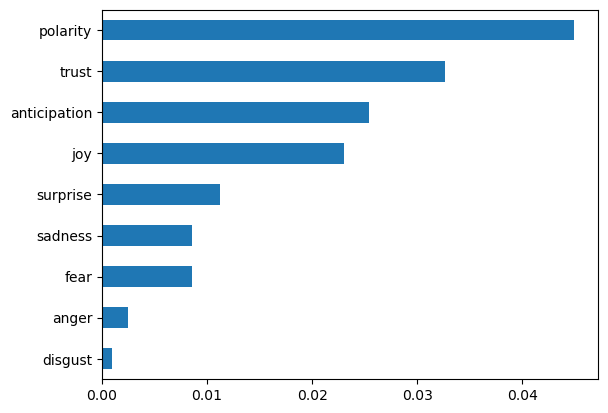

In [13]:
# highest level - all videos together
TOKEN_nrc[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

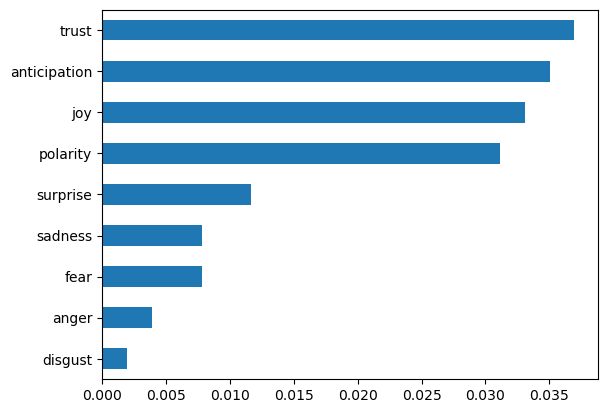

In [14]:
# separate by speaker 
# example - speaker id 201
speaker_201 = TOKEN_nrc.loc[[201]].copy()
speaker_201[emo_cols].mean().sort_values().plot.barh()

In [15]:
# line chart visual
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

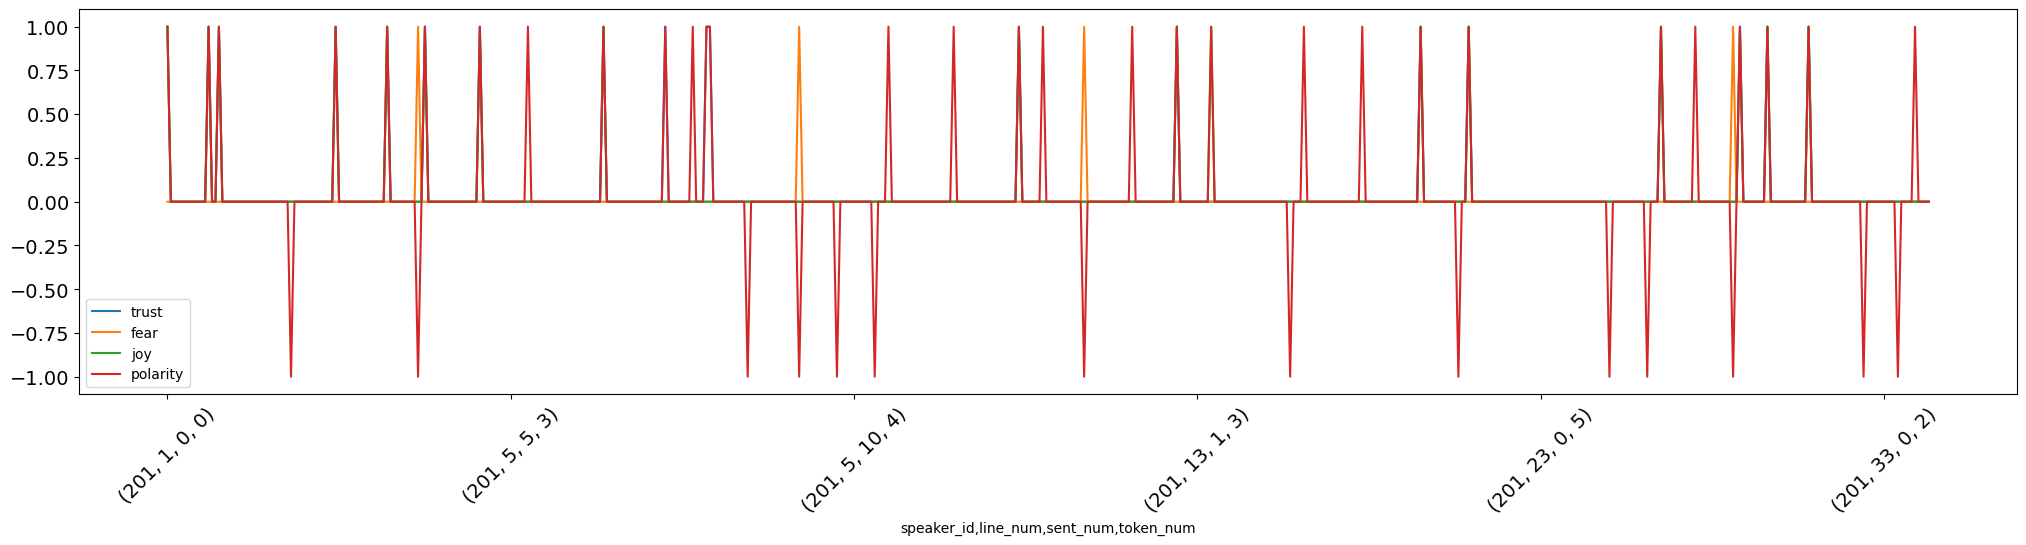

In [16]:
# separate by speaker
# example - speaker id 201

#### looks weird since its not a seamless timeline - would be better at the video level 
plot_sentiments(speaker_201, ['trust','fear','joy','polarity'])

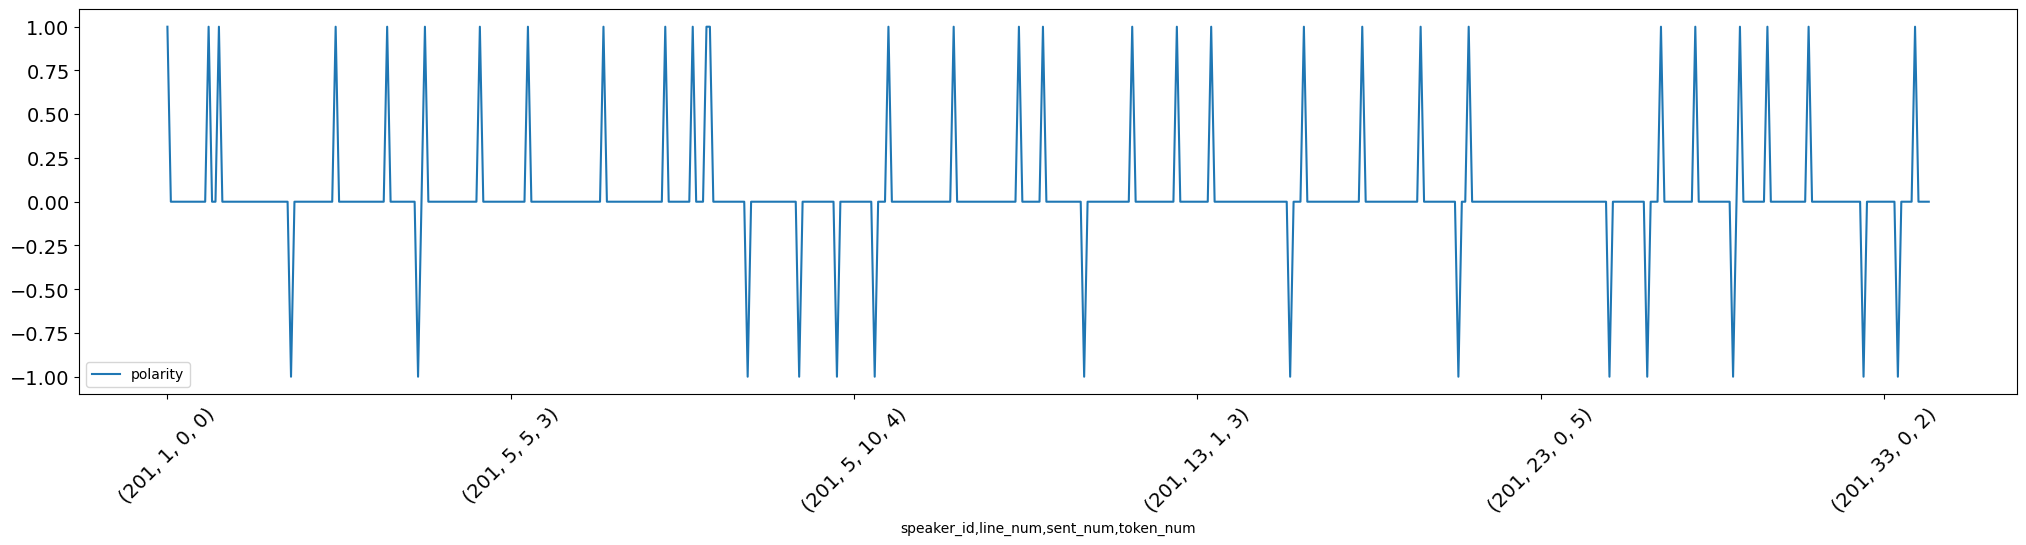

In [17]:
plot_sentiments(speaker_201, ['polarity'])

In [18]:
# Explore the sentiment in texts
# separating by speaker
# example - speaker 201
speaker_201['html'] =  speaker_201.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x['polarity'])), x.token_str), 1)
speaker_201['html'].sample(10)

speaker_id  line_num  sent_num  token_num
201         9         0         1            <span class='sent0'>worries</span>
            5         9         10                <span class='sent0'>or</span>
                      3         0                 <span class='sent0'>So</span>
                      6         0                <span class='sent0'>Our</span>
            15        1         9               <span class='sent0'>that</span>
            25        2         22            <span class='sent0'>active</span>
            3         2         16              <span class='sent0'>have</span>
            11        0         0                 <span class='sent0'>Um</span>
            23        1         12              <span class='sent0'>then</span>
            15        2         3             <span class='sent0'>during</span>
Name: html, dtype: object

In [19]:
# group at the sentence level
speaker_201_sents = speaker_201.groupby(['speaker_id','line_num','sent_num'])[emo_cols].mean()
speaker_201_sents['sent_str'] = speaker_201.groupby(['speaker_id','line_num','sent_num']).term_str.apply(lambda x: x.str.cat(sep=' '))
speaker_201_sents['html_str'] = speaker_201.groupby(['speaker_id','line_num','sent_num']).html.apply(lambda x: x.str.cat(sep=' '))

In [20]:
def sample_sentences(df, sentiment):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, sentiment], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [21]:
sample_sentences(speaker_201_sents, 'polarity')

Sentiment,ID,Sentence
0.0,"(201, 9, 3)",You 're trouble Nina
0.1429,"(201, 33, 1)",Take some breathe and calm your body
0.0,"(201, 5, 4)",Nina up here please
-0.0769,"(201, 5, 9)",So do you guys have any questions about any expectations or if you wan na add any more expectations we should have for a small group
0.0,"(201, 15, 0)",Yeah of course
0.0,"(201, 7, 0)",Okay
0.1429,"(201, 11, 2)",You guys can talk about that all
0.0,"(201, 15, 1)",Um after small group we can talk about that
0.1,"(201, 5, 6)",Our second expec uh expectation is to be active listeners
0.3333,"(201, 1, 0)",Good morning class


In [22]:
sample_sentences(speaker_201_sents, 'trust')

Sentiment,ID,Sentence
0.0,"(201, 25, 3)",And
0.0,"(201, 7, 2)",Um if that 's all
0.0,"(201, 17, 0)",Yeah
1.0,"(201, 3, 0)",Good
0.0,"(201, 23, 0)",Well we have to make sure that we know our expectations with um each other
0.0,"(201, 5, 4)",Nina up here please
0.0,"(201, 35, 0)",And simulation
0.0769,"(201, 25, 0)",I know I sound boring but it 's good to go over them
0.0,"(201, 7, 1)",Um Emily um after small group we can talk about um whatever 's going on with you
0.0,"(201, 15, 0)",Yeah of course


In [23]:
sample_sentences(speaker_201_sents, 'fear')

Sentiment,ID,Sentence
0.0,"(201, 25, 1)",Jayla
0.0,"(201, 9, 1)",Yeah we can talk about it
0.0,"(201, 21, 1)",Yeah that could be for the active listeners
0.0588,"(201, 11, 1)",So when others are talking we wan na hear what they have to say all after class
0.0,"(201, 7, 2)",Um if that 's all
0.0,"(201, 3, 4)",So can you can I see what raising your hand looks like
0.0,"(201, 15, 0)",Yeah of course
0.0,"(201, 31, 0)",I understand but I understand that you feel frustrated right now
0.0,"(201, 9, 2)",Um Carlos did you have any ideas
0.0385,"(201, 5, 9)",So do you guys have any questions about any expectations or if you wan na add any more expectations we should have for a small group


In [24]:
# using vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [25]:
#!pip install vaderSentiment

In [26]:
speaker_201_vader_cols = speaker_201_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
speaker_201_vader = pd.concat([speaker_201_sents, speaker_201_vader_cols], axis=1)

<AxesSubplot:xlabel='speaker_id,line_num,sent_num'>

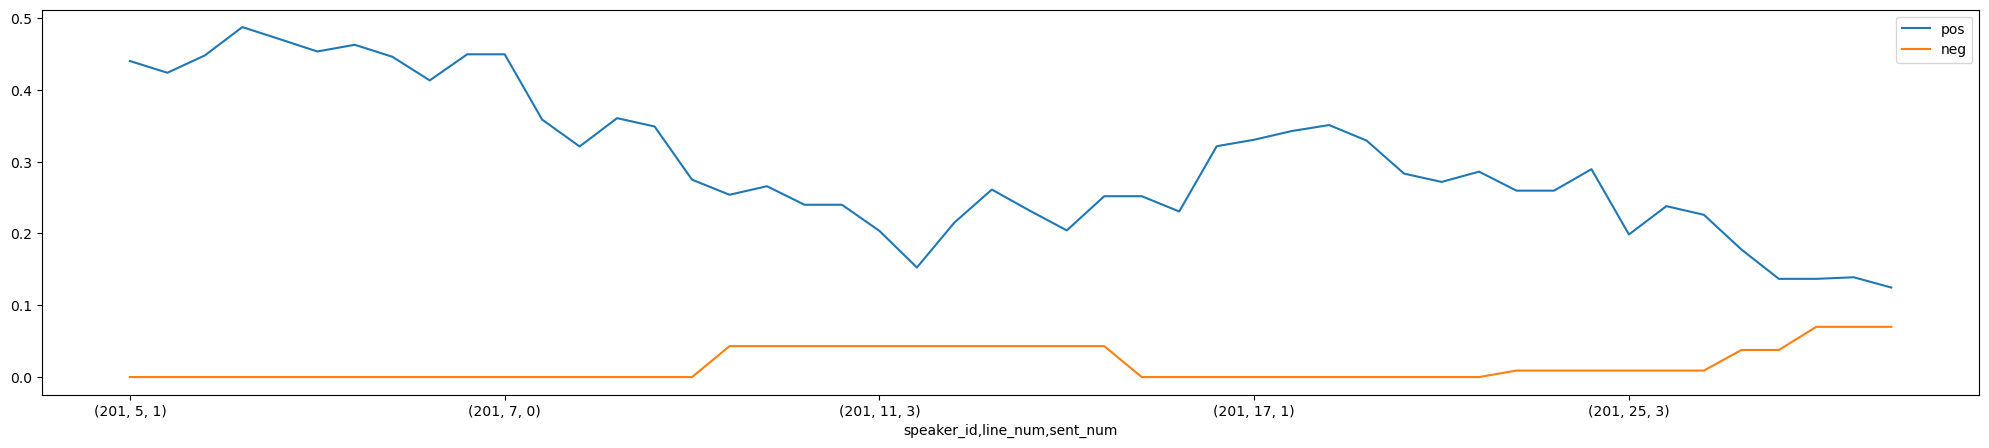

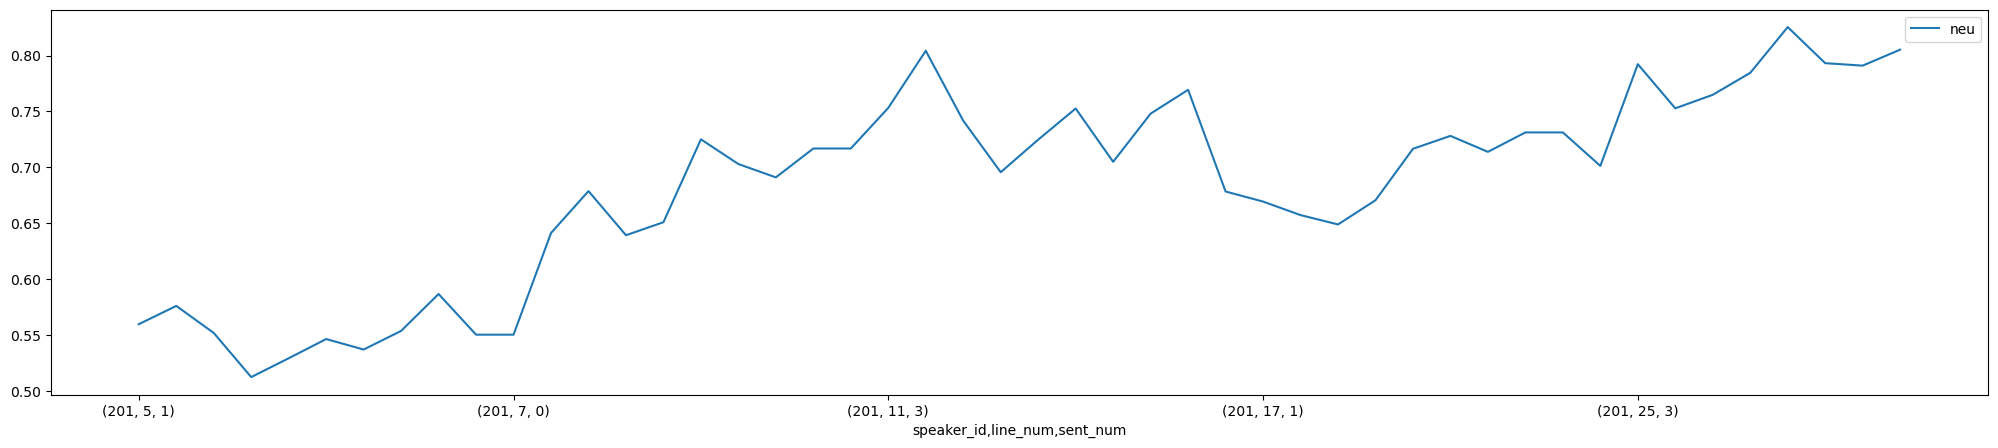

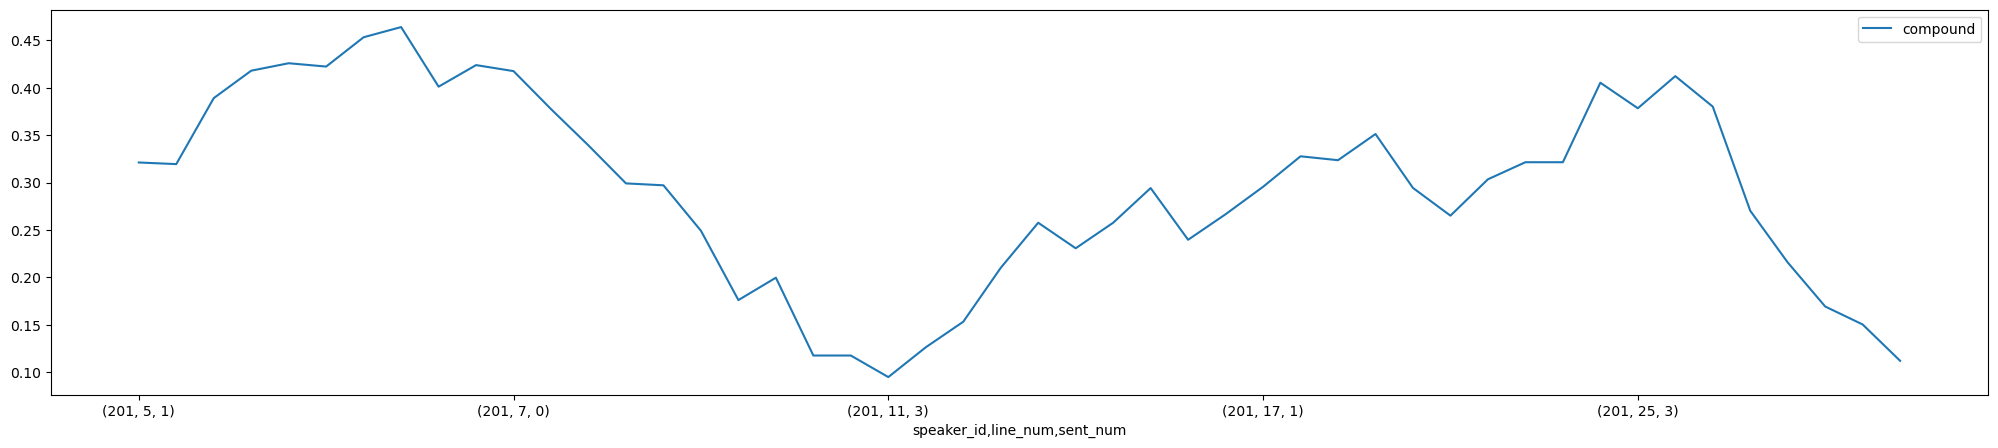

In [27]:
w = int(speaker_201_vader.shape[0] / 5)
speaker_201_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
speaker_201_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
speaker_201_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))